In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_rows', 500)

In [2]:
# miss_val = ["n/a", "na", "--"]
data = pd.read_csv("./Input/train.csv", delimiter=","
                   #nan_values = miss_val
                  )

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
subdata = data[["OverallQual", "YearBuilt", "TotalBsmtSF", "GrLivArea", "SalePrice"]]
subdata.shape

(1460, 5)

In [5]:
subdata.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice
0,7,2003,856,1710,208500
1,6,1976,1262,1262,181500
2,7,2001,920,1786,223500
3,7,1915,756,1717,140000
4,8,2000,1145,2198,250000


# IV. Identify additional relevant feature
- Previously we have found 4 features that are useful for predicting the sale price. Let’s find out if there are other features that we should consider as well.
1. Find features with high correlation: For each numeric feature, calculate its correlation coefficient with feature SalePrice. Identify one feature (other than aforementioned 5 features) that has the strongest correlation with the sale prices.

In [6]:
print("Correlation coefficient:", np.corrcoef(subdata['OverallQual'], subdata['SalePrice']))
print("Correlation coefficient:", np.corrcoef(subdata['YearBuilt'], subdata['SalePrice']))
print("Correlation coefficient:", np.corrcoef(subdata['TotalBsmtSF'], subdata['SalePrice']))
print("Correlation coefficient:", np.corrcoef(subdata['GrLivArea'], subdata['SalePrice']))

Correlation coefficient: [[1.        0.7909816]
 [0.7909816 1.       ]]
Correlation coefficient: [[1.         0.52289733]
 [0.52289733 1.        ]]
Correlation coefficient: [[1.         0.61358055]
 [0.61358055 1.        ]]
Correlation coefficient: [[1.         0.70862448]
 [0.70862448 1.        ]]


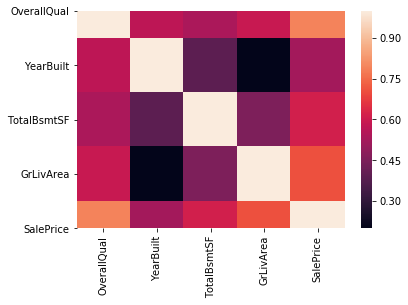

In [7]:
sns.heatmap(subdata.corr())

In [8]:
data.corr().head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982


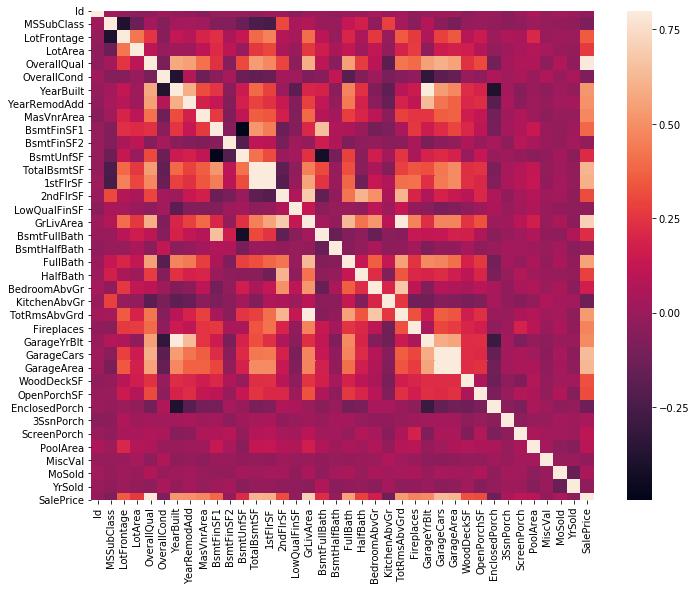

In [9]:
coef = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(coef, vmax=.8, square=True)

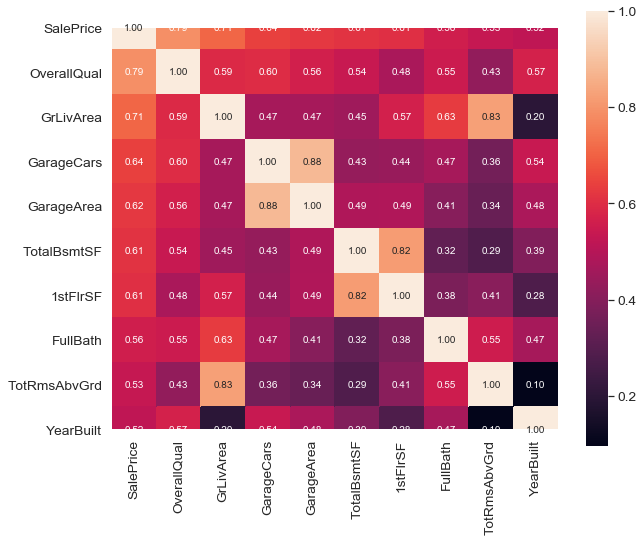

In [10]:
k = 10
cols = coef.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

### Observations:
- Upon observing the zoomed heatmap 'GarageCars' has the highest correlation coefficient

a) 'GarageCars' and 'GarageArea' are the same. So, we will take GarageCars since it has higher correlation to the 'SalePrice'

In [11]:
subdata.insert(5, 'GarageCars', data['GarageCars'])

In [12]:
subdata.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice,GarageCars
0,7,2003,856,1710,208500,2
1,6,1976,1262,1262,181500,2
2,7,2001,920,1786,223500,2
3,7,1915,756,1717,140000,3
4,8,2000,1145,2198,250000,3


## 2. Feature engineering: Based on our experience, the total area of the house and the average area per room should also be important factors in determining the price. Please create these two columns using the following formula:

1) total area = total area above ground (“GrLivArea”) + total basement area (“TotalBsmtSF”)

In [13]:
subdata['TotalArea'] = subdata['GrLivArea'] + subdata['TotalBsmtSF']
subdata.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice,GarageCars,TotalArea
0,7,2003,856,1710,208500,2,2566
1,6,1976,1262,1262,181500,2,2524
2,7,2001,920,1786,223500,2,2706
3,7,1915,756,1717,140000,3,2473
4,8,2000,1145,2198,250000,3,3343


2) area per room = total area above ground (“GrLivArea”) / number of rooms (“TotRmsAbvGrd”).

In [14]:
subdata['AreaPerRoom'] = subdata['GrLivArea'] / data['TotRmsAbvGrd']
subdata.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice,GarageCars,TotalArea,AreaPerRoom
0,7,2003,856,1710,208500,2,2566,213.750000
1,6,1976,1262,1262,181500,2,2524,210.333333
2,7,2001,920,1786,223500,2,2706,297.666667
3,7,1915,756,1717,140000,3,2473,245.285714
4,8,2000,1145,2198,250000,3,3343,244.222222


# V. Prepare data for k-Nearest-Neighbor method.

1. Create a new data frame with SalePrice and the 7 selected features.

In [15]:
subdata.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice,GarageCars,TotalArea,AreaPerRoom
0,7,2003,856,1710,208500,2,2566,213.750000
1,6,1976,1262,1262,181500,2,2524,210.333333
2,7,2001,920,1786,223500,2,2706,297.666667
3,7,1915,756,1717,140000,3,2473,245.285714
4,8,2000,1145,2198,250000,3,3343,244.222222


#### 2. For each of the 7 selected features, calculate its mean value and standard deviation. (These values will be used in V.3 and VI.1.)

In [16]:
# For each of the 7 selected features, calculating its mean value and standard deviations and storing it respective lists
mean1=[]
st_d=[]
subdata2 = ['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'TotalArea', 'AreaPerRoom']

for columns in subdata2:
    mean = subdata[columns].mean()
    std = subdata[columns].std()
    
    mean1.append(mean)
    st_d.append(std)
# Appending the resulting to respective mean and std lists

#### 3. Feature normalization: the kNN method usually works best if the features have the similar range, and each feature follows a normal (bell-shaped) distribution. To achieve this, subtract each column with its mean value, and then divide by its deviation.

In [17]:
count = 0
for columns in subdata2:
    subdata[columns] = subdata[columns] - mean1[count]
    subdata[columns] = subdata[columns] / st_d[count]
    count = count + 1;

In [18]:
subdata.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice,GarageCars,TotalArea,AreaPerRoom
0,0.651256,1.050634,-0.459145,0.370207,208500,0.311618,-0.008370,-0.383442
1,-0.071812,0.156680,0.466305,-0.482347,181500,0.311618,-0.059365,-0.459809
2,0.651256,0.984415,-0.313261,0.514836,223500,0.311618,0.161616,1.492193
3,0.651256,-1.862993,-0.687089,0.383528,140000,1.649742,-0.121289,0.321418
4,1.374324,0.951306,0.199611,1.298881,250000,1.649742,0.935051,0.297647


# VI. Apply the kNN (k=5) method to predict sale price of the first instance from the test set.

For first instance (call it y) from the test set (test.csv), find 5 instances from the training set that are most similar to it. Consider using the following procedure:

1. For each of the 7 selected features, normalize its value in the same way as V.3 (use the mean value and standard deviation calculated in V.2).

In [19]:
test_data = pd.read_csv("./Input/test.csv", delimiter=",")

In [20]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [21]:
test_data["TotalArea"] = test_data["GrLivArea"] + test_data["TotalBsmtSF"]
test_data["AreaPerRoom"] = test_data["GrLivArea"] / test_data["TotRmsAbvGrd"]
test_data = test_data[subdata2]

In [22]:
test_data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,TotalArea,AreaPerRoom
0,5,1961,882.0,896,1.0,1778.0,179.200000
1,6,1958,1329.0,1329,1.0,2658.0,221.500000
2,5,1997,928.0,1629,2.0,2557.0,271.500000
3,6,1998,926.0,1604,2.0,2530.0,229.142857
4,8,1992,1280.0,1280,2.0,2560.0,256.000000


In [23]:
count = 0
for columns in subdata2:
    test_data[columns] = test_data[columns] - mean1[count]
    test_data[columns] = test_data[columns] / st_d[count]
    count = count + 1;

In [24]:
test_data.head()

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,TotalArea,AreaPerRoom
0,-0.794879,-0.339961,-0.399880,-1.178852,-1.026506,-0.965146,-1.155675
1,-0.071812,-0.439289,0.619027,-0.354844,-1.026506,0.103335,-0.210221
2,-0.794879,0.851977,-0.295026,0.216062,0.311618,-0.019297,0.907337
3,-0.071812,0.885087,-0.299585,0.168486,0.311618,-0.052080,-0.039394
4,1.374324,0.686430,0.507335,-0.448092,0.311618,-0.015655,0.560894


In [25]:
test_data.head(1)

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,GarageCars,TotalArea,AreaPerRoom
0,-0.794879,-0.339961,-0.39988,-1.178852,-1.026506,-0.965146,-1.155675


In [26]:
subdata["Diff"] = np.sqrt((subdata["OverallQual"] - -0.794879)**2 + (subdata["YearBuilt"] - -0.339961)**2 + 
                          (subdata["TotalBsmtSF"] - -0.399880)**2 + (subdata["GrLivArea"] - -1.178852)**2 + 
                          (subdata["GarageCars"] - -1.026506)**2 + (subdata["TotalArea"] - -0.965146)**2 + 
                          (subdata["AreaPerRoom"] - -1.155675)**2)
subdata["Diff"].head()

0    3.119374
1    2.258344
2    4.097894
3    4.121972
4    5.075092
Name: Diff, dtype: float64

In [27]:
k = 5
index_knearest = subdata["Diff"].values.argsort()[:k]
index = subdata.index[index_knearest]
knearest = subdata.loc[index, :]
knearest

,OverallQual,YearBuilt,TotalBsmtSF,GrLivArea,SalePrice,GarageCars,TotalArea,AreaPerRoom,Diff
870,-0.794879,-0.306852,-0.372527,-1.182658,109500,-1.026506,-0.953005,-1.164616,0.045676
698,-0.794879,-0.207523,-0.372527,-1.182658,138500,-1.026506,-0.953005,-1.164616,0.136124
499,-0.794879,-0.439289,-0.331497,-1.148404,120000,-1.026506,-0.909294,-1.084151,0.153963
773,-0.794879,-0.439289,-0.331497,-1.148404,114500,-1.026506,-0.909294,-1.084151,0.153963
1220,-0.794879,-0.240633,-0.331497,-1.148404,115000,-1.026506,-0.909294,-1.084151,0.153963


In [28]:
pred = knearest["SalePrice"].mean()
print("The sale price for the first instance after applying k=5 method is: $", pred)

The sale price for the first instance after applying k=5 method is: $ 119500.0
